# Lab 1: Single Layer LSTM with IMDB Subwords Dataset

In [ ]:
# get the data

import tensorflow_datasets as tfds

imdb, info = tfds.load("imdb_reviews/subwords8k", as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteLSGLQF/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteLSGLQF/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteLSGLQF/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
# prepare the data

BUFFER_SIZE = 10000
BATCH_SIZE = 16

train_data, test_data = imdb['train'], imdb['test']

train_data.shuffle(BUFFER_SIZE)

train_dataset = train_data.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

tokenizer_subwords = info.features['text'].encoder

In [ ]:
# create the model
import tensorflow as tf

embedding_dim = 64
lstm_dim = 64
dense_dim = 64

model = tf.keras.Sequential([tf.keras.layers.Embedding(tokenizer_subwords.vocab_size, embedding_dim),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
                             tf.keras.layers.Dense(dense_dim, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 10

history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
1563/1563 [==============================] - 270s 167ms/step - loss: 0.6148 - accuracy: 0.6638 - val_loss: 0.6877 - val_accuracy: 0.5000
Epoch 2/10
1563/1563 [==============================] - 117s 75ms/step - loss: 0.5219 - accuracy: 0.7459 - val_loss: 0.4873 - val_accuracy: 0.7708
Epoch 3/10
1563/1563 [==============================] - 106s 68ms/step - loss: 0.3789 - accuracy: 0.8419 - val_loss: 0.4771 - val_accuracy: 0.7978
Epoch 4/10
1563/1563 [==============================] - 106s 68ms/step - loss: 0.3804 - accuracy: 0.8352 - val_loss: 0.4864 - val_accuracy: 0.8118
Epoch 5/10
1563/1563 [==============================] - 107s 69ms/step - loss: 0.4063 - accuracy: 0.8200 - val_loss: 0.4352 - val_accuracy: 0.8252
Epoch 6/10
1563/1563 [==============================] - 105s 67ms/step - loss: 0.2400 - accuracy: 0.9061 - val_loss: 0.3767 - val_accuracy: 0.8519
Epoch 7/10
1563/1563 [==============================] - 107s 69ms/step - loss: 0.1820 - accuracy: 0.9338 - val_loss: 

# Lab 2: Multiple Layer LSTM with IMDB Reviews Dataset

In [ ]:
# get the data

import tensorflow_datasets as tfds

imdb, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

tokenizer = info.features['text'].encoder

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteK218N4/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteK218N4/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteK218N4/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
# prepare data

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_data, test_data = imdb['train'], imdb['test']

train_dataset = train_data.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

Here we use multiple LSTM Layer, below simulate how to use multiple LSTM and how it works.

In [ ]:
import tensorflow as tf
import numpy as np

batch_size = 1
timesteps = 20
features = 8
lstm_dim = 64

print(f'Batch_size: {batch_size}')
print(f'timestemps (sequence length): {timesteps}')
print(f'features (embedding size): {features}')
print(f'LSTM output units: {lstm_dim}')

random_input = np.random.rand(batch_size, timesteps, features)
print(f'\nShape of Input: {random_input.shape}')

# LSTM without return_sequence
lstm = tf.keras.layers.LSTM(lstm_dim)
lstm_output = lstm(random_input)
print(f'Shape of lstm with return sequence false: {lstm_output.shape}')

# LSTM with return_sequence
lstm_rs = tf.keras.layers.LSTM(lstm_dim, return_sequences=True)
lstm_rs_output = lstm_rs(random_input)
print(f'Shape of lstm with return sequence true: {lstm_rs_output.shape}')

Batch_size: 1
timestemps (sequence length): 20
features (embedding size): 8
LSTM output units: 64

Shape of Input: (1, 20, 8)
Shape of lstm with return sequence false: (1, 64)
Shape of lstm with return sequence true: (1, 20, 64)


because it uses two or more LSTM layer, first layers need to be set return_sequences=True

In [ ]:
# create model
EMBEDDING_DIM = 64
LSTM_DIM = 64
LSTM_DIM2 = 32
DENSE_DIM = 64

model = tf.keras.Sequential([tf.keras.layers.Embedding(tokenizer.vocab_size, EMBEDDING_DIM),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(LSTM_DIM, return_sequences=True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(LSTM_DIM2)),
                             tf.keras.layers.Dense(DENSE_DIM, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirection  (None, None, 128)         66048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 635329 (2.42 MB)
Trainable params: 635329 

In [ ]:
NUM_EPOCHS = 10

history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 150s 360ms/step - loss: 0.5142 - accuracy: 0.7415 - val_loss: 0.4196 - val_accuracy: 0.8223
Epoch 2/10
391/391 [==============================] - 111s 285ms/step - loss: 0.5812 - accuracy: 0.7069 - val_loss: 0.5776 - val_accuracy: 0.7359
Epoch 3/10
391/391 [==============================] - 106s 272ms/step - loss: 0.4214 - accuracy: 0.8132 - val_loss: 0.4088 - val_accuracy: 0.8141
Epoch 4/10
391/391 [==============================] - 96s 245ms/step - loss: 0.3118 - accuracy: 0.8742 - val_loss: 0.4433 - val_accuracy: 0.8190
Epoch 5/10
391/391 [==============================] - 112s 287ms/step - loss: 0.2750 - accuracy: 0.8894 - val_loss: 0.3685 - val_accuracy: 0.8566
Epoch 6/10
391/391 [==============================] - 106s 271ms/step - loss: 0.2479 - accuracy: 0.9061 - val_loss: 0.3508 - val_accuracy: 0.8633
Epoch 7/10
391/391 [==============================] - 87s 221ms/step - loss: 0.2104 - accuracy: 0.9184 - val_loss: 0.3921 - v

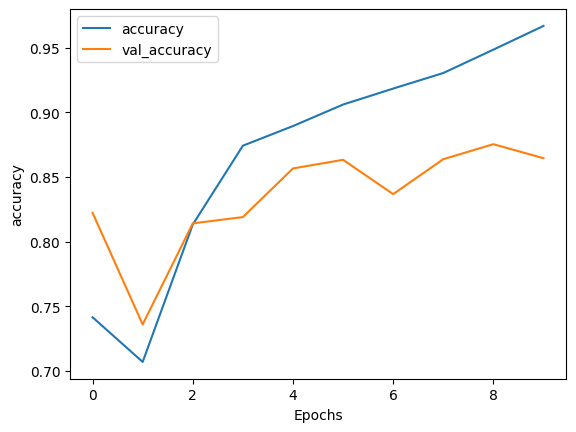

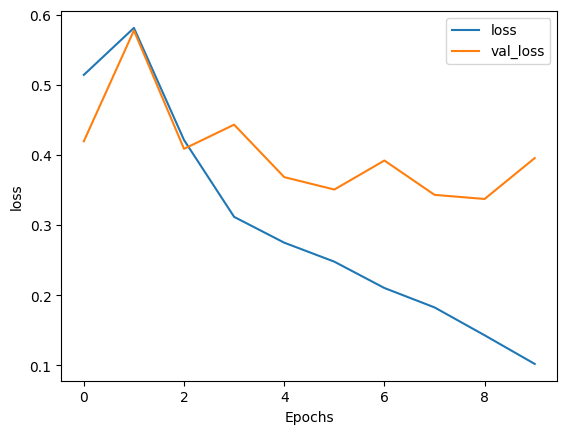

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Lab 3: Using Convolutional Neural Networks (Conv1D layer) IMDB Subwords

Here we use Conv1D layer because text only have 1 dimension also Global Maximu Pooling layer to get maximum value across all dimension

In [ ]:
# simulate the layer
import tensorflow as tf
import numpy as np

batch_size = 1
timesteps= 20
features = 20
filters = 128
kernel_size = 5

random_input = np.random.rand(batch_size, timesteps, features)
print(f'Input shape: {random_input.shape}')

# simulate Convolutional layer
conv1d = tf.keras.layers.Conv1D(filters, kernel_size=kernel_size, activation='relu')
conv1d_output = conv1d(random_input)
print(f'Output shape of Conv1D layer: {conv1d_output.shape}')

# simulate global max pooling layer
gmp = tf.keras.layers.GlobalMaxPooling1D()
gmp_output = gmp(conv1d_output)
print(f'Output shape of Global Max Pooling layer: {gmp_output.shape}')

Input shape: (1, 20, 20)
Output shape of Conv1D layer: (1, 16, 128)
Output shape of Global Max Pooling layer: (1, 128)


In [ ]:
EMBEDDING_DIM = 64
FILTERS = 128
KERNEL_SIZE = 5
DENSE_DIM = 64

model = tf.keras.Sequential([tf.keras.layers.Embedding(tokenizer.vocab_size, EMBEDDING_DIM),
                             tf.keras.layers.Conv1D(FILTERS, kernel_size=KERNEL_SIZE, activation='relu'),
                             tf.keras.layers.GlobalMaxPooling1D(),
                             tf.keras.layers.Dense(DENSE_DIM, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          523840    
                                                                 
 conv1d_3 (Conv1D)           (None, None, 128)         41088     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 573249 (2.19 MB)
Trainable params: 573249 (2.19 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
NUM_EPOCHS = 10

history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 101s 250ms/step - loss: 0.4484 - accuracy: 0.7703 - val_loss: 0.2818 - val_accuracy: 0.8819
Epoch 2/10
391/391 [==============================] - 43s 109ms/step - loss: 0.1871 - accuracy: 0.9272 - val_loss: 0.2680 - val_accuracy: 0.8904
Epoch 3/10
391/391 [==============================] - 32s 82ms/step - loss: 0.0634 - accuracy: 0.9829 - val_loss: 0.3107 - val_accuracy: 0.8888
Epoch 4/10
391/391 [==============================] - 26s 65ms/step - loss: 0.0129 - accuracy: 0.9986 - val_loss: 0.3543 - val_accuracy: 0.8931
Epoch 5/10
391/391 [==============================] - 20s 52ms/step - loss: 0.0032 - accuracy: 0.9998 - val_loss: 0.3818 - val_accuracy: 0.8946
Epoch 6/10
391/391 [==============================] - 17s 43ms/step - loss: 8.4261e-04 - accuracy: 1.0000 - val_loss: 0.4093 - val_accuracy: 0.8946
Epoch 7/10
391/391 [==============================] - 15s 37ms/step - loss: 4.3855e-04 - accuracy: 1.0000 - val_loss: 0.4298 - va

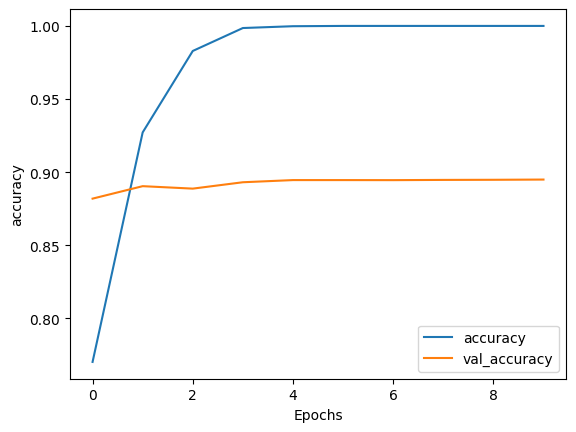

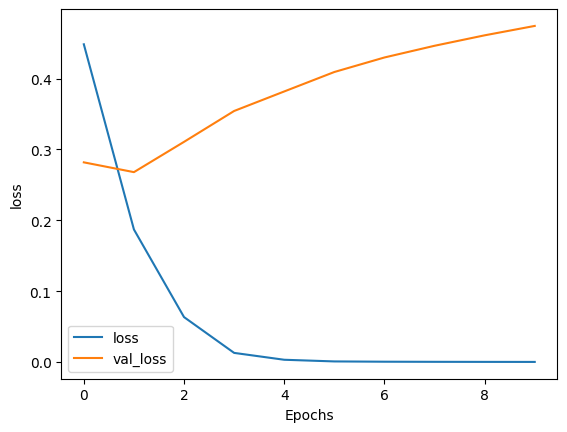

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Lab 4: Building Models for the IMDB Reviews Dataset

In [ ]:
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import numpy as np

In [ ]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteZ49JM6/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteZ49JM6/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteZ49JM6/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_data, test_data = imdb['train'], imdb['test']

train_sentences = []
train_labels = []
test_sentences = []
test_labels = []

for s, l in train_data:
  train_sentences.append(s.numpy().decode('utf-8'))
  train_labels.append(l.numpy())

for s, l in test_data:
  test_sentences.append(s.numpy().decode('utf-8'))
  test_labels.append(l.numpy())

train_labels_final = np.array(train_labels)
test_labels_final = np.array(test_labels)

In [ ]:
# set up tokenizer
VOCAB_SIZE = 10000
MAXLEN = 120
PADDING = 'post'
OOV_TOK = "<OOV>"

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOK)
word_index = tokenizer.word_index
tokenizer.fit_on_texts(train_sentences)

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=PADDING, maxlen=MAXLEN)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding=PADDING, maxlen=MAXLEN)

In [ ]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

## Flatten Model

In [ ]:
EMBEDDING_DIM = 16
DENSE_DIM = 6

model_flatten = tf.keras.Sequential([tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAXLEN),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(DENSE_DIM, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

model_flatten.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_flatten.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 120, 16)           160000    
                                                                 
 flatten_6 (Flatten)         (None, 1920)              0         
                                                                 
 dense_16 (Dense)            (None, 6)                 11526     
                                                                 
 dense_17 (Dense)            (None, 1)                 7         
                                                                 
Total params: 171533 (670.05 KB)
Trainable params: 171533 (670.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
BATCH_SIZE = 128
NUM_EPOCHS = 10

history_flatten = model_flatten.fit(train_padded, train_labels_final, batch_size=BATCH_SIZE, epochs = NUM_EPOCHS, validation_data=(test_padded, test_labels_final))

Epoch 1/10
196/196 [==============================] - 26s 129ms/step - loss: 0.6057 - accuracy: 0.6616 - val_loss: 0.3933 - val_accuracy: 0.8317
Epoch 2/10
196/196 [==============================] - 11s 56ms/step - loss: 0.2832 - accuracy: 0.8870 - val_loss: 0.3194 - val_accuracy: 0.8609
Epoch 3/10
196/196 [==============================] - 6s 32ms/step - loss: 0.1735 - accuracy: 0.9397 - val_loss: 0.3319 - val_accuracy: 0.8588
Epoch 4/10
196/196 [==============================] - 6s 30ms/step - loss: 0.0963 - accuracy: 0.9762 - val_loss: 0.3703 - val_accuracy: 0.8535
Epoch 5/10
196/196 [==============================] - 4s 23ms/step - loss: 0.0470 - accuracy: 0.9938 - val_loss: 0.4108 - val_accuracy: 0.8508
Epoch 6/10
196/196 [==============================] - 4s 21ms/step - loss: 0.0243 - accuracy: 0.9978 - val_loss: 0.4514 - val_accuracy: 0.8478
Epoch 7/10
196/196 [==============================] - 2s 8ms/step - loss: 0.0146 - accuracy: 0.9987 - val_loss: 0.4771 - val_accuracy: 0.84

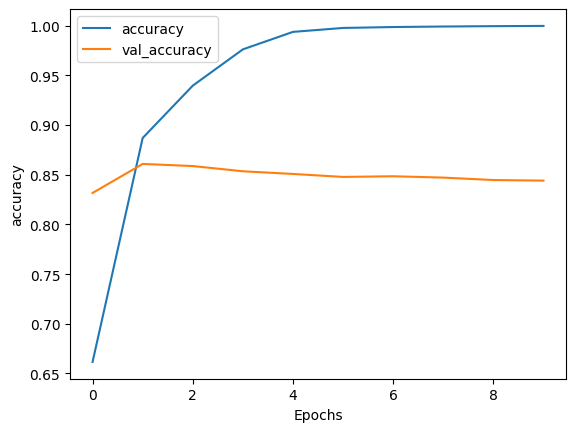

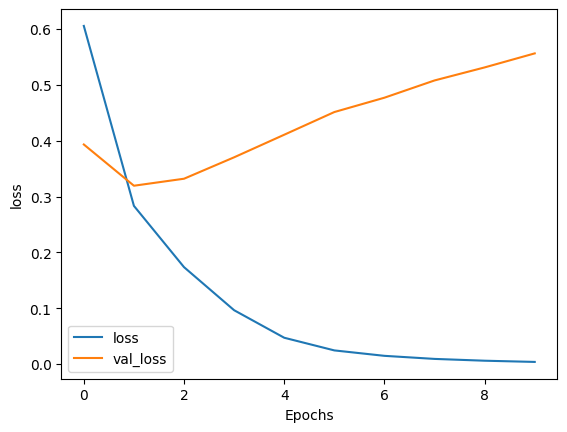

In [ ]:
# Plot the accuracy and loss history
plot_graphs(history_flatten, 'accuracy')
plot_graphs(history_flatten, 'loss')

## LSTM Model

In [ ]:
embedding_dim = 16
dense_dim = 6
lstm_dim = 32

model_lstm = tf.keras.Sequential([tf.keras.layers.Embedding(VOCAB_SIZE, embedding_dim, input_length=MAXLEN),
                                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
                                  tf.keras.layers.Dense(dense_dim, activation='relu'),
                                  tf.keras.layers.Dense(1, activation='sigmoid')])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_lstm.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 120, 16)           160000    
                                                                 
 bidirectional_5 (Bidirecti  (None, 64)                12544     
 onal)                                                           
                                                                 
 dense_21 (Dense)            (None, 6)                 390       
                                                                 
 dense_22 (Dense)            (None, 1)                 7         
                                                                 
Total params: 172941 (675.55 KB)
Trainable params: 172941 (675.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
BATCH_SIZE = 128
NUM_EPOCHS = 10

history_lstm = model_lstm.fit(train_padded, train_labels_final, batch_size=BATCH_SIZE, epochs = NUM_EPOCHS, validation_data=(test_padded, test_labels_final))

Epoch 1/10
196/196 [==============================] - 26s 105ms/step - loss: 0.5407 - accuracy: 0.7002 - val_loss: 0.3559 - val_accuracy: 0.8491
Epoch 2/10
196/196 [==============================] - 10s 51ms/step - loss: 0.2932 - accuracy: 0.8808 - val_loss: 0.3391 - val_accuracy: 0.8553
Epoch 3/10
196/196 [==============================] - 7s 37ms/step - loss: 0.2260 - accuracy: 0.9129 - val_loss: 0.3509 - val_accuracy: 0.8558
Epoch 4/10
196/196 [==============================] - 6s 30ms/step - loss: 0.1911 - accuracy: 0.9299 - val_loss: 0.3565 - val_accuracy: 0.8485
Epoch 5/10
196/196 [==============================] - 5s 24ms/step - loss: 0.1621 - accuracy: 0.9426 - val_loss: 0.3680 - val_accuracy: 0.8464
Epoch 6/10
196/196 [==============================] - 6s 30ms/step - loss: 0.1468 - accuracy: 0.9501 - val_loss: 0.4242 - val_accuracy: 0.8422
Epoch 7/10
196/196 [==============================] - 5s 25ms/step - loss: 0.1217 - accuracy: 0.9609 - val_loss: 0.4996 - val_accuracy: 0.8

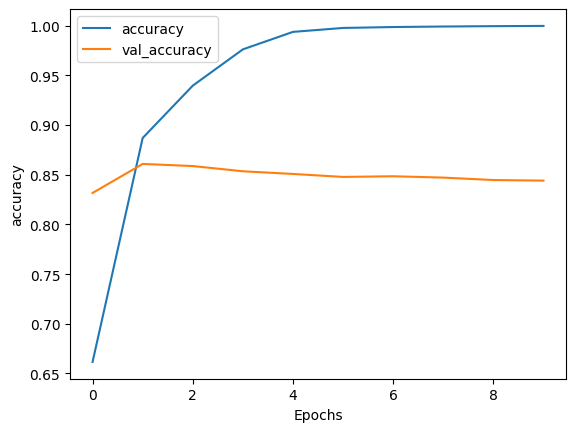

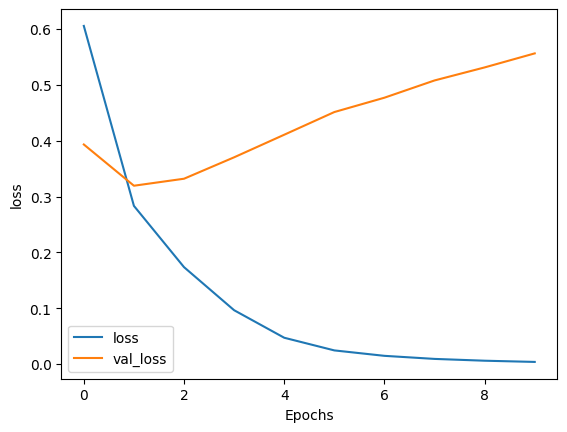

In [ ]:
# Plot the accuracy and loss history
plot_graphs(history_flatten, 'accuracy')
plot_graphs(history_flatten, 'loss')

## GRU

In [ ]:
embedding_dim = 16
dense_dim = 6
gru_dim = 32

model_gru = tf.keras.Sequential([tf.keras.layers.Embedding(VOCAB_SIZE, embedding_dim, input_length=MAXLEN),
                                  tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
                                  tf.keras.layers.Dense(dense_dim, activation='relu'),
                                  tf.keras.layers.Dense(1, activation='sigmoid')])

model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_gru.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 120, 16)           160000    
                                                                 
 bidirectional_6 (Bidirecti  (None, 64)                9600      
 onal)                                                           
                                                                 
 dense_23 (Dense)            (None, 6)                 390       
                                                                 
 dense_24 (Dense)            (None, 1)                 7         
                                                                 
Total params: 169997 (664.05 KB)
Trainable params: 169997 (664.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
BATCH_SIZE = 128
NUM_EPOCHS = 10

history_gru = model_gru.fit(train_padded, train_labels_final, batch_size=BATCH_SIZE, epochs = NUM_EPOCHS, validation_data=(test_padded, test_labels_final))

Epoch 1/10
196/196 [==============================] - 27s 116ms/step - loss: 0.5743 - accuracy: 0.6735 - val_loss: 0.3634 - val_accuracy: 0.8461
Epoch 2/10
196/196 [==============================] - 12s 63ms/step - loss: 0.2952 - accuracy: 0.8816 - val_loss: 0.3281 - val_accuracy: 0.8587
Epoch 3/10
196/196 [==============================] - 12s 60ms/step - loss: 0.2273 - accuracy: 0.9156 - val_loss: 0.3390 - val_accuracy: 0.8570
Epoch 4/10
196/196 [==============================] - 8s 40ms/step - loss: 0.1837 - accuracy: 0.9356 - val_loss: 0.3644 - val_accuracy: 0.8517
Epoch 5/10
196/196 [==============================] - 6s 28ms/step - loss: 0.1556 - accuracy: 0.9468 - val_loss: 0.4052 - val_accuracy: 0.8444
Epoch 6/10
196/196 [==============================] - 4s 22ms/step - loss: 0.1312 - accuracy: 0.9588 - val_loss: 0.4214 - val_accuracy: 0.8419
Epoch 7/10
196/196 [==============================] - 5s 26ms/step - loss: 0.1206 - accuracy: 0.9621 - val_loss: 0.5191 - val_accuracy: 0.

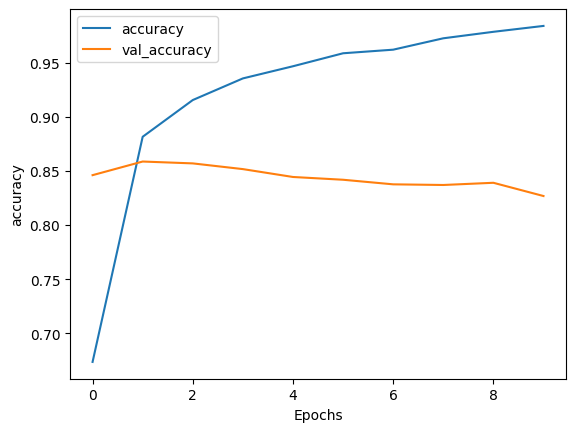

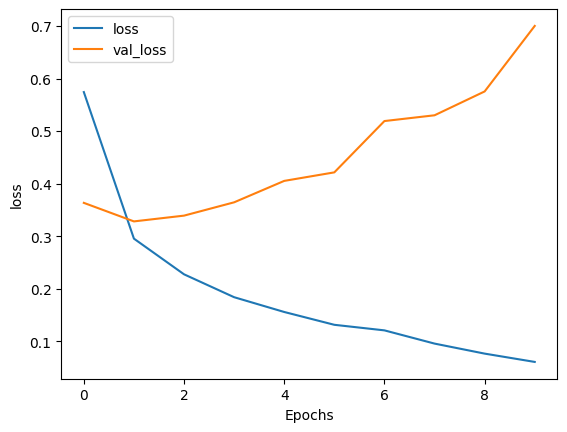

In [ ]:
# Plot the accuracy and loss history
plot_graphs(history_gru, 'accuracy')
plot_graphs(history_gru, 'loss')

## Convolution

In [ ]:
embedding_dim = 16
dense_dim = 6
filters = 128
kernel_size = 5

model_conv = tf.keras.Sequential([tf.keras.layers.Embedding(VOCAB_SIZE, embedding_dim, input_length=MAXLEN),
                                  tf.keras.layers.Conv1D(filters, kernel_size=kernel_size, activation='relu'),
                                  tf.keras.layers.GlobalAveragePooling1D(),
                                  tf.keras.layers.Dense(dense_dim, activation='relu'),
                                  tf.keras.layers.Dense(1, activation='sigmoid')])

model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_conv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          10368     
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171149 (668.55 KB)
Trainable params: 171149 (668.55 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
BATCH_SIZE = 128
NUM_EPOCHS = 10

history_conv = model_conv.fit(train_padded, train_labels_final, batch_size=BATCH_SIZE, epochs = NUM_EPOCHS, validation_data=(test_padded, test_labels_final))

Epoch 1/10
196/196 [==============================] - 35s 118ms/step - loss: 0.5331 - accuracy: 0.7067 - val_loss: 0.3620 - val_accuracy: 0.8422
Epoch 2/10
196/196 [==============================] - 12s 59ms/step - loss: 0.2785 - accuracy: 0.8855 - val_loss: 0.3345 - val_accuracy: 0.8528
Epoch 3/10
196/196 [==============================] - 6s 28ms/step - loss: 0.2206 - accuracy: 0.9128 - val_loss: 0.3658 - val_accuracy: 0.8469
Epoch 4/10
196/196 [==============================] - 5s 27ms/step - loss: 0.1879 - accuracy: 0.9291 - val_loss: 0.3876 - val_accuracy: 0.8455
Epoch 5/10
196/196 [==============================] - 4s 20ms/step - loss: 0.1613 - accuracy: 0.9420 - val_loss: 0.4304 - val_accuracy: 0.8360
Epoch 6/10
196/196 [==============================] - 3s 16ms/step - loss: 0.1405 - accuracy: 0.9509 - val_loss: 0.4698 - val_accuracy: 0.8336
Epoch 7/10
196/196 [==============================] - 3s 17ms/step - loss: 0.1219 - accuracy: 0.9585 - val_loss: 0.5195 - val_accuracy: 0.8

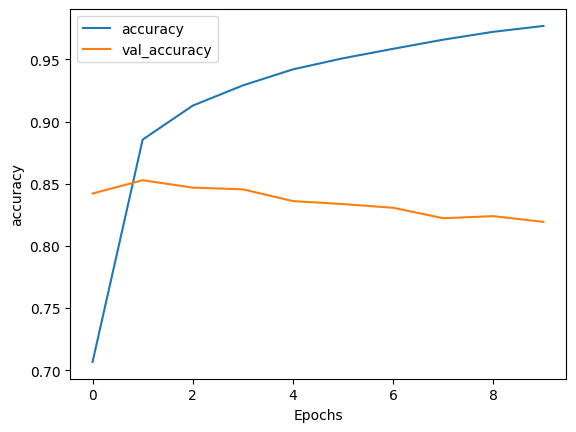

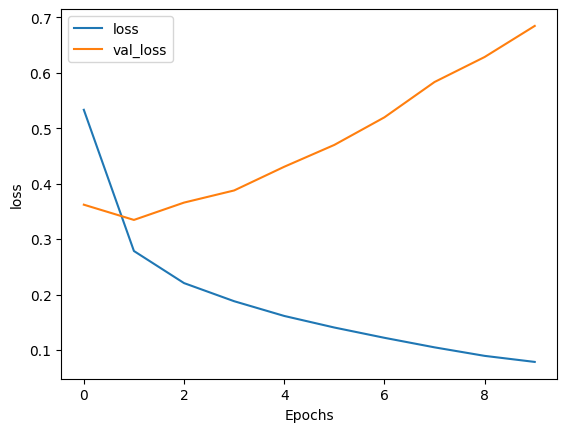

In [ ]:
# Plot the accuracy and loss history
plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')

#### LOOKS LIKE all four models have approximately the same accuracy performance on IMDB Reviews Dataset

# Lab 5: Training a Sarcasm Detection Model using Bidirectional LSTMs

In [ ]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2023-10-24 14:38:09--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json.1’

sarcasm.json.1      100%[===================>]   5.38M  3.95MB/s    in 1.4s    

2023-10-24 14:38:10 (3.95 MB/s) - ‘sarcasm.json.1’ saved [5643545/5643545]



In [ ]:
# get the data
import json

with open('./sarcasm.json') as f:
  datastore = json.load(f)

sentences = []
labels=[]

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])


In [ ]:
# parse the data
train_size = 20000
train_sentences = sentences[:train_size]
test_sentences = sentences[train_size:]

train_labels = labels[:train_size]
test_labels = labels[train_size:]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

VOCAB_SIZE = 10000
OOV_TOK = "<OOV>"
padding_type = 'post'
trunc_type='post'
max_length=120

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOK)
tokenizer.fit_on_texts(train_sentences)

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, truncating=trunc_type, maxlen=max_length)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding=padding_type, truncating=trunc_type, maxlen=max_length)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [ ]:
# create the model
import tensorflow as tf

embedding_dim = 16
lstm_dim = 32
dense_dim=32

model_lstm = tf.keras.Sequential([tf.keras.layers.Embedding(VOCAB_SIZE, embedding_dim, input_length=max_length),
                              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
                              tf.keras.layers.Dense(dense_dim, activation='relu'),
                              tf.keras.layers.Dense(1, activation='sigmoid')])

model_lstm.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                12544     
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 174657 (682.25 KB)
Trainable params: 174657 (682.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
NUM_EPOCHS = 10

history_lstm = model_lstm.fit(train_padded, train_labels, epochs=NUM_EPOCHS, validation_data=(test_padded, test_labels))

Epoch 1/10
625/625 [==============================] - 21s 29ms/step - loss: 0.4177 - accuracy: 0.7956 - val_loss: 0.3305 - val_accuracy: 0.8551
Epoch 2/10
625/625 [==============================] - 9s 14ms/step - loss: 0.2220 - accuracy: 0.9097 - val_loss: 0.3450 - val_accuracy: 0.8542
Epoch 3/10
625/625 [==============================] - 9s 14ms/step - loss: 0.1476 - accuracy: 0.9446 - val_loss: 0.3860 - val_accuracy: 0.8508
Epoch 4/10
625/625 [==============================] - 9s 14ms/step - loss: 0.0930 - accuracy: 0.9675 - val_loss: 0.4927 - val_accuracy: 0.8454
Epoch 5/10
625/625 [==============================] - 9s 14ms/step - loss: 0.0571 - accuracy: 0.9816 - val_loss: 0.5533 - val_accuracy: 0.8432
Epoch 6/10
625/625 [==============================] - 8s 13ms/step - loss: 0.0350 - accuracy: 0.9898 - val_loss: 0.6736 - val_accuracy: 0.8396
Epoch 7/10
625/625 [==============================] - 9s 14ms/step - loss: 0.0227 - accuracy: 0.9930 - val_loss: 0.7984 - val_accuracy: 0.833

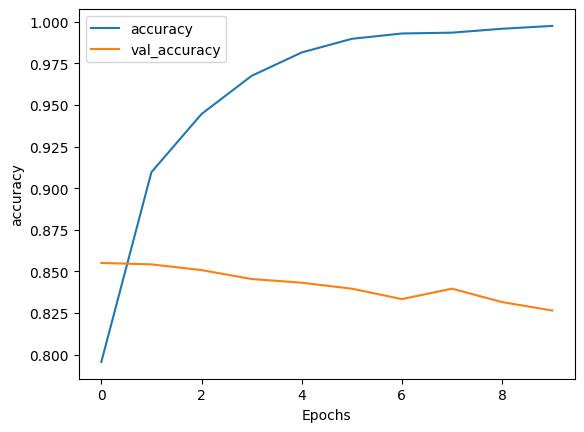

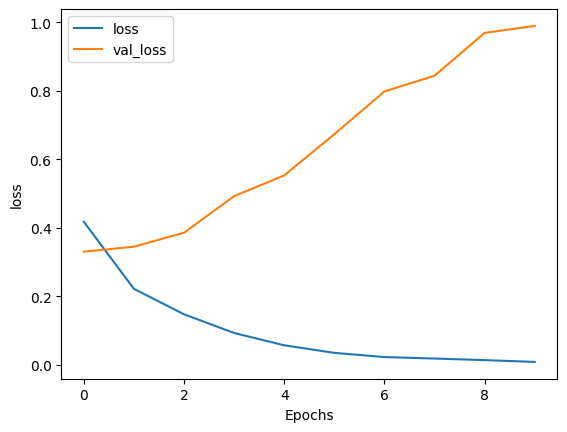

In [ ]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

# Lab 6: Convolutional Model on Sarcasm Dataset

In [ ]:
# create the model
import tensorflow as tf

embedding_dim = 16
dense_dim=32
filters=128
kernel_size=5

model_conv = tf.keras.Sequential([tf.keras.layers.Embedding(VOCAB_SIZE, embedding_dim, input_length=max_length),
                                  tf.keras.layers.Conv1D(filters, kernel_size=kernel_size, activation='relu'),
                                  tf.keras.layers.GlobalMaxPooling1D(),
                                  tf.keras.layers.Dense(dense_dim, activation='relu'),
                                  tf.keras.layers.Dense(1, activation='sigmoid')])

model_conv.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_conv.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d_1 (Conv1D)           (None, 116, 128)          10368     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_8 (Dense)             (None, 32)                4128      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 174529 (681.75 KB)
Trainable params: 174529 (681.75 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [ ]:
NUM_EPOCHS = 10

history_conv = model_conv.fit(train_padded, train_labels, epochs=NUM_EPOCHS, validation_data=(test_padded, test_labels))

Epoch 1/10
625/625 [==============================] - 17s 17ms/step - loss: 0.4358 - accuracy: 0.7836 - val_loss: 0.3520 - val_accuracy: 0.8427
Epoch 2/10
625/625 [==============================] - 5s 7ms/step - loss: 0.2216 - accuracy: 0.9129 - val_loss: 0.3532 - val_accuracy: 0.8477
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 0.1073 - accuracy: 0.9625 - val_loss: 0.4671 - val_accuracy: 0.8442
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 0.0405 - accuracy: 0.9875 - val_loss: 0.6486 - val_accuracy: 0.8319
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 0.0138 - accuracy: 0.9965 - val_loss: 0.7611 - val_accuracy: 0.8381
Epoch 6/10
625/625 [==============================] - 3s 5ms/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 0.8425 - val_accuracy: 0.8338
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.9287 - val_accuracy: 0.8386
Epoc

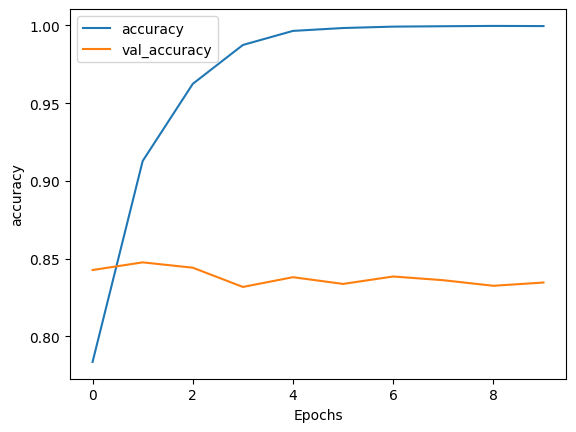

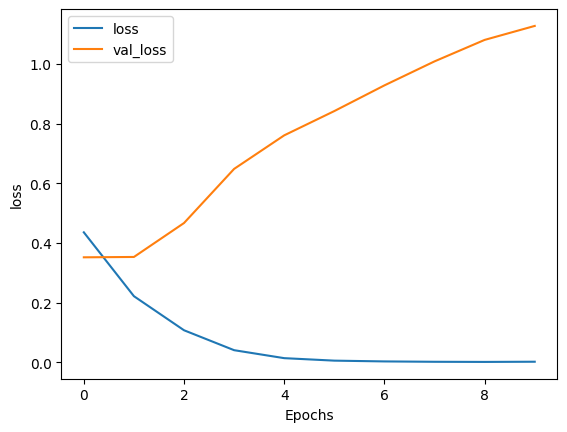

In [ ]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')

# The best result from assignment, i think Convolution Layer 👍